In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from datetime import datetime
import math
from scipy.stats import mannwhitneyu
from itertools import combinations
import scipy

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The data used for this project is represents Indonesia's trending YouTube videos, containing of 148,149 rows across 27 columns. Each row represents a distinct video whereas each row contains that video's characteristic. Firstly, we look at the first five rows of the data in order to to gain familiarity with the data. 

In [ ]:
# Provide the link to share the file/folder located on Google Drive.
link ='https://drive.google.com/file/d/1b23_N_uLP3SltdPy6L90iQO-silRCPlI/view?usp=share_link'
# Extract the ID of the file
id = link.split("/")[-2]
# Create and load the dataset
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('trending.csv') 
# Store the dataset in a dataframe
df = pd.read_csv('trending.csv')
display(df.head())

<ipython-input-3-3a5bac5aa143>:9: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('trending.csv')


,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In doing this project, we would like to know several things, which are listed below.


1.   Exploratory data analysis
2.   How do the comments corelate to dislike and like count?
3.   How do like, dislike, and comments differ from each other?
4.   How do publish time of the video affect views and comments?
5.   What is the average video duration?
6.   On average, how long after uploading will the video be marked as trending?



We make a copy dataframe for the raw dataframe.

## 1. Exploratory data analysis

First, we perform exploratory data analysis to obtain a sense of what the data looks like. Exploratory data analysis is mainly used to observe initial trends or patterns of the data, where we plot figures and graphs that we think would be valuable information. EDA also helps to identify the quality of data, the distribution of data, and the presence of any outliers or missing values.


We use `df.info()` to get a concise summary of a DataFrame.

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148149 entries, 0 to 148148
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           95027 non-null   object 
 1   publish_time       148149 non-null  object 
 2   channel_id         148149 non-null  object 
 3   title              148149 non-null  object 
 4   description        142622 non-null  object 
 5   thumbnail_url      95027 non-null   object 
 6   thumbnail_width    95027 non-null   float64
 7   thumbnail_height   95027 non-null   float64
 8   channel_name       148149 non-null  object 
 9   tags               127609 non-null  object 
 10  category_id        148149 non-null  int64  
 11  live_status        148149 non-null  object 
 12  local_title        148149 non-null  object 
 13  local_description  142622 non-null  object 
 14  duration           148149 non-null  object 
 15  dimension          148149 non-null  object 
 16  de

## 1.1. Description of the dataset column

In here, we first describe the column definitions, thereby allowing us to gain a clear understanding of the variables present in the dataset. It helps us interpret the data correctly and know what each column represents. This understanding is crucial for making meaningful interpretations and drawing accurate conclusions from the data.

*   `video_id`: The unique identifier for each video distinguished by id
*   `publish_time`: The publish date and time of the video
*   `channel_id`: The unique identifier of the channel that published the video
*   `title`: The title of the video
*   `description`: The description of the video
*   `channel_name`: The name of the channel that published the video
*   `tags`: The tags associated with the video
*   `category_id`: The category identifier for the video
*   `live_status`: Whether the video is live or not
*   `local_title`: The localized title of the video
*   `local_description`: The localized description of the video
*   `duration`: The duration of the video
*   `dimension`: The dimension of the video
*   `definition`: The definition of the video
*   `caption`: Whether the video has caption or not
*   `license_status`: Whether the video has a license or not
*   `allowed_region`: The region where the video is allowed to be viewed
*   `blocked_region`: The region where the video is blocked from being viewed
*   `view`: The number of views the video has received
*   `like`: The number of likes the video has received
*   `dislike`: The number of dislikes the video has received
*   `favorite`: The number of times the video has been added to a favorite list
*   `comment`: The number of comments the video has received
*   `trending_time`: The date and time the video became trending
*   `title_sentiment`: The sentiment score of the video title

## 1.3. Null Values Handling

Firstly, we check the extent of missing values to assess data quality, handle missing data, ensure proper preprocessing, maintain analysis integrity, and be aware of data completeness. It helps evaluate the reliability of the dataset, determine appropriate strategies for missing data, and prevent biases in analysis.

In [ ]:
# Checking whether the data has missing or null values
df.isna().sum()

video_id              53122
publish_time              0
channel_id                0
title                     0
description            5527
thumbnail_url         53122
thumbnail_width       53122
thumbnail_height      53122
channel_name              0
tags                  20540
category_id               0
live_status               0
local_title               0
local_description      5527
duration                  0
dimension                 0
definition                0
caption                   0
license_status            0
allowed_region       143072
blocked_region       142528
view                     10
like                   1128
dislike               94519
favorite                  0
comment                 446
trending_time             0
dtype: int64

For the `tags` and `local_description`, we can fill the null value with 'No Tags' and 'No Description' since it's possible for a trending video to not have a tags nor a description.

In [ ]:
# Fill the missing values so the accuracy of the analysis and lead to better insights.
df['tags'] = df['tags'].fillna('No Tags')
df['local_description'] = df['local_description'].fillna('No Description')

Same goes for the `allowed_region` and `blocked_region`. It's possible for a trending video to not have a certain allowed region or available in all country, so we fill the null value with 'All Region'

In [ ]:
df['allowed_region'] = df['allowed_region'].fillna('All Region') 
df['blocked_region'] = df['blocked_region'].fillna('All Region')

Considering the data represents trending videos, it would not make sense to fill the data with zeros, and since the distribution of `view`, `like`, 
`dislike` and `comment` data is right-skewed, the median is often a better measure of central tendency than the mean. Therefore, we fill the missing value with median instead of the mean.

Initially, we examine the histograms of the `view`, `like`, `dislike`, and `comment` columns.

### 1.3.1. Views

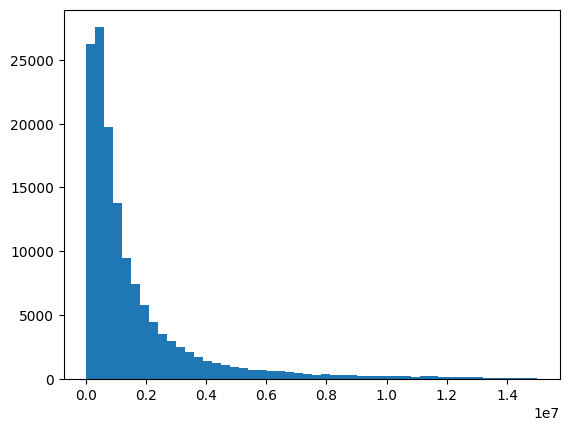

In [ ]:
view = df[df['view'] < 15000000]

plt.hist(view['view'],bins=50)
plt.show()

From our histogram, results conform that the `view` column is right-skewed, thereby making it appropriate to fill the values with its median.

In [ ]:
df['view'] = df['view'].fillna(df['view'].median())

### 1.3.2. Likes Count

Akin to the `Views` column, we render the histogram regarding the `like` column to gain a more representative visual understanding of its spread.

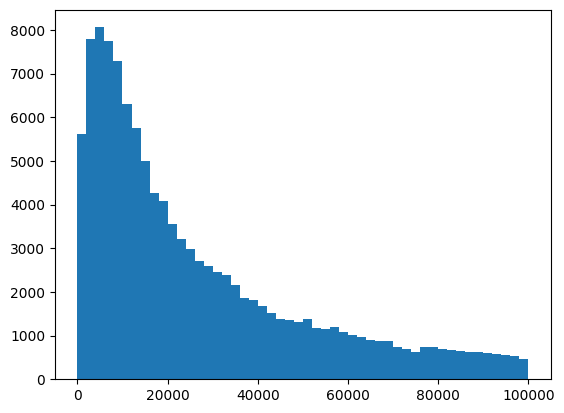

In [ ]:
like = df[df['like'] < 100000]

plt.hist(like['like'],bins=50)
plt.show()

In [ ]:
df['like'] = df['like'].fillna(df['like'].median())

### 1.3.3. Dislikes Count

Similar to the previous two columns, we generate a histogram for the `dislike` column to gain a more comprehensive visual understanding of its distribution.

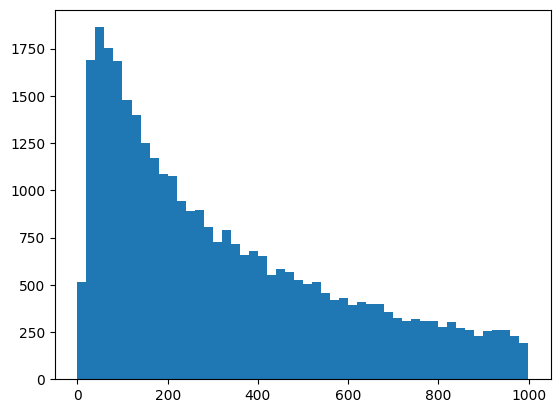

In [ ]:
dislike = df[df['dislike'] < 1000]

plt.hist(dislike['dislike'],bins=50)
plt.show()

In [ ]:
df['dislike'] = df['dislike'].fillna(df['dislike'].median())

### 1.3.4. Comments Count

Finally, we render a histogram for the `comment` column to confirm whether our suspicions regarding right-skewed data is true.

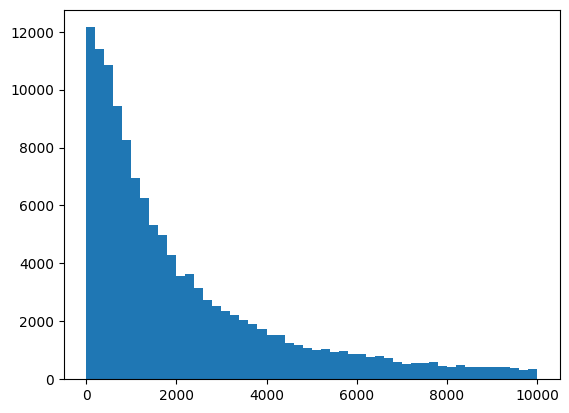

In [ ]:
comment = df[df['comment'] < 10000]

plt.hist(comment['comment'],bins=50)
plt.show()

We now understand the data is indeed right-skewed, hence filling them with median is the appropriate course of action.

In [ ]:
df['comment'] = df['comment'].fillna(df['comment'].median())

### 1.4. Datetime Parsing

It is common to have date and time data stored as strings or objects. As in this case, it is necessary to convert these strings or objects to a datetime format to perform operations such as sorting, filtering, or arithmetic calculations.

Initially, we examine the string pattern to determine the format required for its conversion into a datetime representation.

In [ ]:
df['publish_time']

0         2021-02-05T09:00:34Z
1         2021-02-04T15:54:08Z
2         2021-02-06T03:00:22Z
3         2021-02-05T20:26:08Z
4         2021-02-03T23:14:54Z
                  ...         
148144    2023-04-02T06:11:43Z
148145    2023-03-31T11:30:10Z
148146    2023-04-01T07:59:57Z
148147    2023-03-31T00:00:12Z
148148    2023-04-02T10:00:19Z
Name: publish_time, Length: 148149, dtype: object

The `publish_time` timestamp is in [Zulu](https://www.techtarget.com/whatis/definition/Zulu-Zulu-time) format (military name for UTC).

We use `datetime.strptime()` method to convert the `publish_time` into a `datetime64` format, using a list comprehension.

In [ ]:
df['publish_time'] = [datetime.strptime(str(i), '%Y-%m-%dT%H:%M:%SZ') for i in df['publish_time']]
df['publish_time']

0        2021-02-05 09:00:34
1        2021-02-04 15:54:08
2        2021-02-06 03:00:22
3        2021-02-05 20:26:08
4        2021-02-03 23:14:54
                 ...        
148144   2023-04-02 06:11:43
148145   2023-03-31 11:30:10
148146   2023-04-01 07:59:57
148147   2023-03-31 00:00:12
148148   2023-04-02 10:00:19
Name: publish_time, Length: 148149, dtype: datetime64[ns]

Another datetime column in our data pertains to the column `trending_time`. For this, we can instantly use `pd.to_datetime()` to convert the `trending_time` into a datetime64 format.


In [ ]:
df['trending_time'] = pd.to_datetime(df['trending_time'])
df['trending_time']

0        2021-02-07 05:46:51.832614+00:00
1        2021-02-07 05:46:51.832649+00:00
2        2021-02-07 05:46:51.832664+00:00
3        2021-02-07 05:46:51.832678+00:00
4        2021-02-07 05:46:51.832730+00:00
                       ...               
148144   2023-04-18 06:04:24.338378+00:00
148145   2023-04-18 06:04:24.338388+00:00
148146   2023-04-18 06:04:24.338398+00:00
148147   2023-04-18 06:04:24.338408+00:00
148148   2023-04-18 06:04:24.338700+00:00
Name: trending_time, Length: 148149, dtype: datetime64[ns, UTC]

Subsequently, in order to construct a Correlation Matrix matrix for Pearson Analysis, certain adjustments need to be made to certain columns to ensure their inclusion. The first column to process is `definition`, where we label-encoded the column since it only has 2 different values.

In [ ]:
df['definition'].value_counts()

hd    147545
sd       604
Name: definition, dtype: int64

In [ ]:
definition_dict = {'hd':1, 'sd':0}
 
# Map to a column
df['definition'] =df['definition'].map(definition_dict)

To generate a correlation matrix with numeric values only, a list comprehension was thereby employed to calculate the count of `blocked_region` occurrences per video. This approach allows us to obtain the necessary numeric data for constructing the correlation matrix.

In [ ]:
df['blocked_region'] = [0 if i == 'All Region' else len(i) for i in df['blocked_region']] 

# Verify results
# We can use `assert` so that it raises an exception if df['blocked_region'] was not successfully type-casted into integers.
assert isinstance(df['blocked_region'].sum(), (int, np.integer))

Then we check if there is any numeric column that contains the same value in the entire dataset

In [ ]:
print(df.favorite.value_counts())
print(df.thumbnail_width.value_counts())
print(df.thumbnail_height.value_counts())

0    148149
Name: favorite, dtype: int64
480.0    95027
Name: thumbnail_width, dtype: int64
360.0    95027
Name: thumbnail_height, dtype: int64


We drop columns that are not needed such as `thumbnail_url` since is unique for all videos also `thumbnail_width`, `thumbnail_height` and `favorite` and since they has the same value throughout the data, and hence would not convey anything.

In [ ]:
df = df.drop(['thumbnail_url','thumbnail_width', 'thumbnail_height','favorite'], axis=1) 

For `category_id` we notice that the `dtypes` is `int` not category, so to proceed, we must convert the integer type to a category type.

In [ ]:
df['category_id'] = df['category_id'].astype('category')

Regarding the `category_id`, we encode the ID to a new column `category` to facilitate understanding of each category. This `category_dict` was sourced from the accompanying JSON file within the [Kaggle page](https://www.kaggle.com/datasets/syahrulhamdani/indonesias-trending-youtube-video-statistics?datasetId=1143485&sortBy=dateRun&tab=profile&select=category.json)

In [ ]:
category_dict = {1:'Film & Animation',
                  2:'Autos & Vehicles',
                  10:'Music',
                  15 :'Pets & Animals',
                  17:'Sports',
                  18:'Short Movies',
                  19:'Travel & Events',
                  20:'Gaming',
                  21:'Videoblogging',
                  22 :'People & Blogs',
                  23:'Comedy',
                  24:'Entertainment',
                  25:'News & Politics',
                  26 :'Howto & Style',
                  27:'Education',
                  28:'Science & Technology',
                  30:'Movie',
                  31:'Anime/Animation',
                  32:'Action/Adventure',
                  33:'Classics',
                  34:'Comedy',
                  35:'Documentary',
                  36:'Drama',
                  37:'Family',
                  38:'Foreign',
                  39:'Horror',
                  40:'Sci-Fi/Fantasy',
                  41:'Thriller',
                  42:'Shorts',
                  43:'Shows',
                  44:'Trailers'}
 
# map to a column
df['category'] = df['category_id'].map(category_dict)

Next, we can call `value_counts()` in `df['category']` to profie the data and gain a better understanding of the range and spread of values within each category.

In [ ]:
df['category'].value_counts()

Entertainment           42022
Music                   35583
People & Blogs          16886
Gaming                  13174
Sports                  12601
News & Politics          7368
Film & Animation         4936
Comedy                   4545
Autos & Vehicles         3460
Howto & Style            2201
Science & Technology     1807
Education                1144
Pets & Animals           1060
Travel & Events           898
Name: category, dtype: int64

To identify a better proportion apart from numbers, we create a pie chart that accurately represented the distribution of category IDs in the dataset.

In [ ]:
ax = px.pie(df, names=df['category'].value_counts().index,values=df['category'].value_counts().values, title='Trending by category')
ax.show()

Same applies to `license_status`. We create a pie chart that accurately represented the distribution of license status in the dataset.

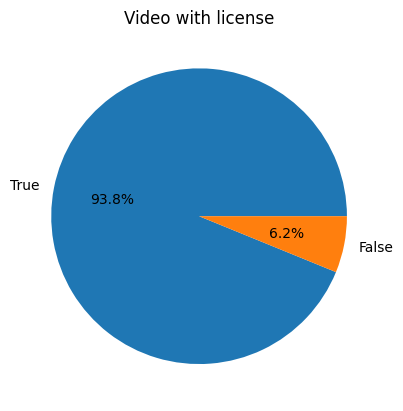

In [ ]:
plt.pie(df['license_status'].value_counts().values, labels=df['license_status'].value_counts().index,autopct='%1.1f%%')
plt.title('Video with license')
plt.show()

Based on point number 2, when performing a Pearson's Correlation Analysis, it is preferable for the variables involved to exhibit a normal distribution. However, in contrast, when conducting a Mann-Whitney U test, it is necessary for the variables to be non-normally distributed. In this dataset, the raw data itself demonstrates a right-skewed distribution. Therefore, for the purpose of the Mann-Whitney U test, we will retain the non-normalized data.

In [ ]:
df_new = df.copy()

## 2. Pearson Correlation Analysis
### How do the comments correlate to dislike and like counts?
The first step is to calculate the Pearson correlation coefficient. The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.

One of the assumptions of the Pearson correlation analysis is that both variables should be normally distributed. From EDA, we know that this data is right-skewed, where it is now appropriate to harness the logarithmic transformation to normalise the data. The logarithmic transformation works by compressing its range and reducing the influence of extreme values. This transformation helps to approximate a normal or near-normal distribution for the log-transformed data.

In [ ]:
# Apply log normalization
df['like'] = [np.log(i) for i in df['like']]
df['dislike'] = [np.log(i) for i in df['dislike']]
df['comment'] = [np.log(i) for i in df['comment']]
# Uncomment to visualize the variable
# plt.hist(df['like'],bins=50)
# plt.show()

# plt.hist(df['dislike'],bins=40)
# plt.show()

# plt.hist(df['comment'],bins=50)
# plt.show()

<ipython-input-30-8d29f4d3ad2a>:2: RuntimeWarning:

divide by zero encountered in log

<ipython-input-30-8d29f4d3ad2a>:3: RuntimeWarning:

divide by zero encountered in log

<ipython-input-30-8d29f4d3ad2a>:4: RuntimeWarning:

divide by zero encountered in log



After completing the data adjustment during the exploratory data analysis (EDA) phase, our next step is to construct a correlation matrix.

In [ ]:
# We use corr() function to find the correlation among the columns in the Dataframe using ‘pearson’ keyword argument. 
coef = df.corr(method='pearson', min_periods=1) 

<ipython-input-31-dcb2f6fb045c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Once the correlation matrix has been constructed, we can employ a heatmap to visually represent the correlations within the matrix.

<ipython-input-61-738cd31e9b05>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

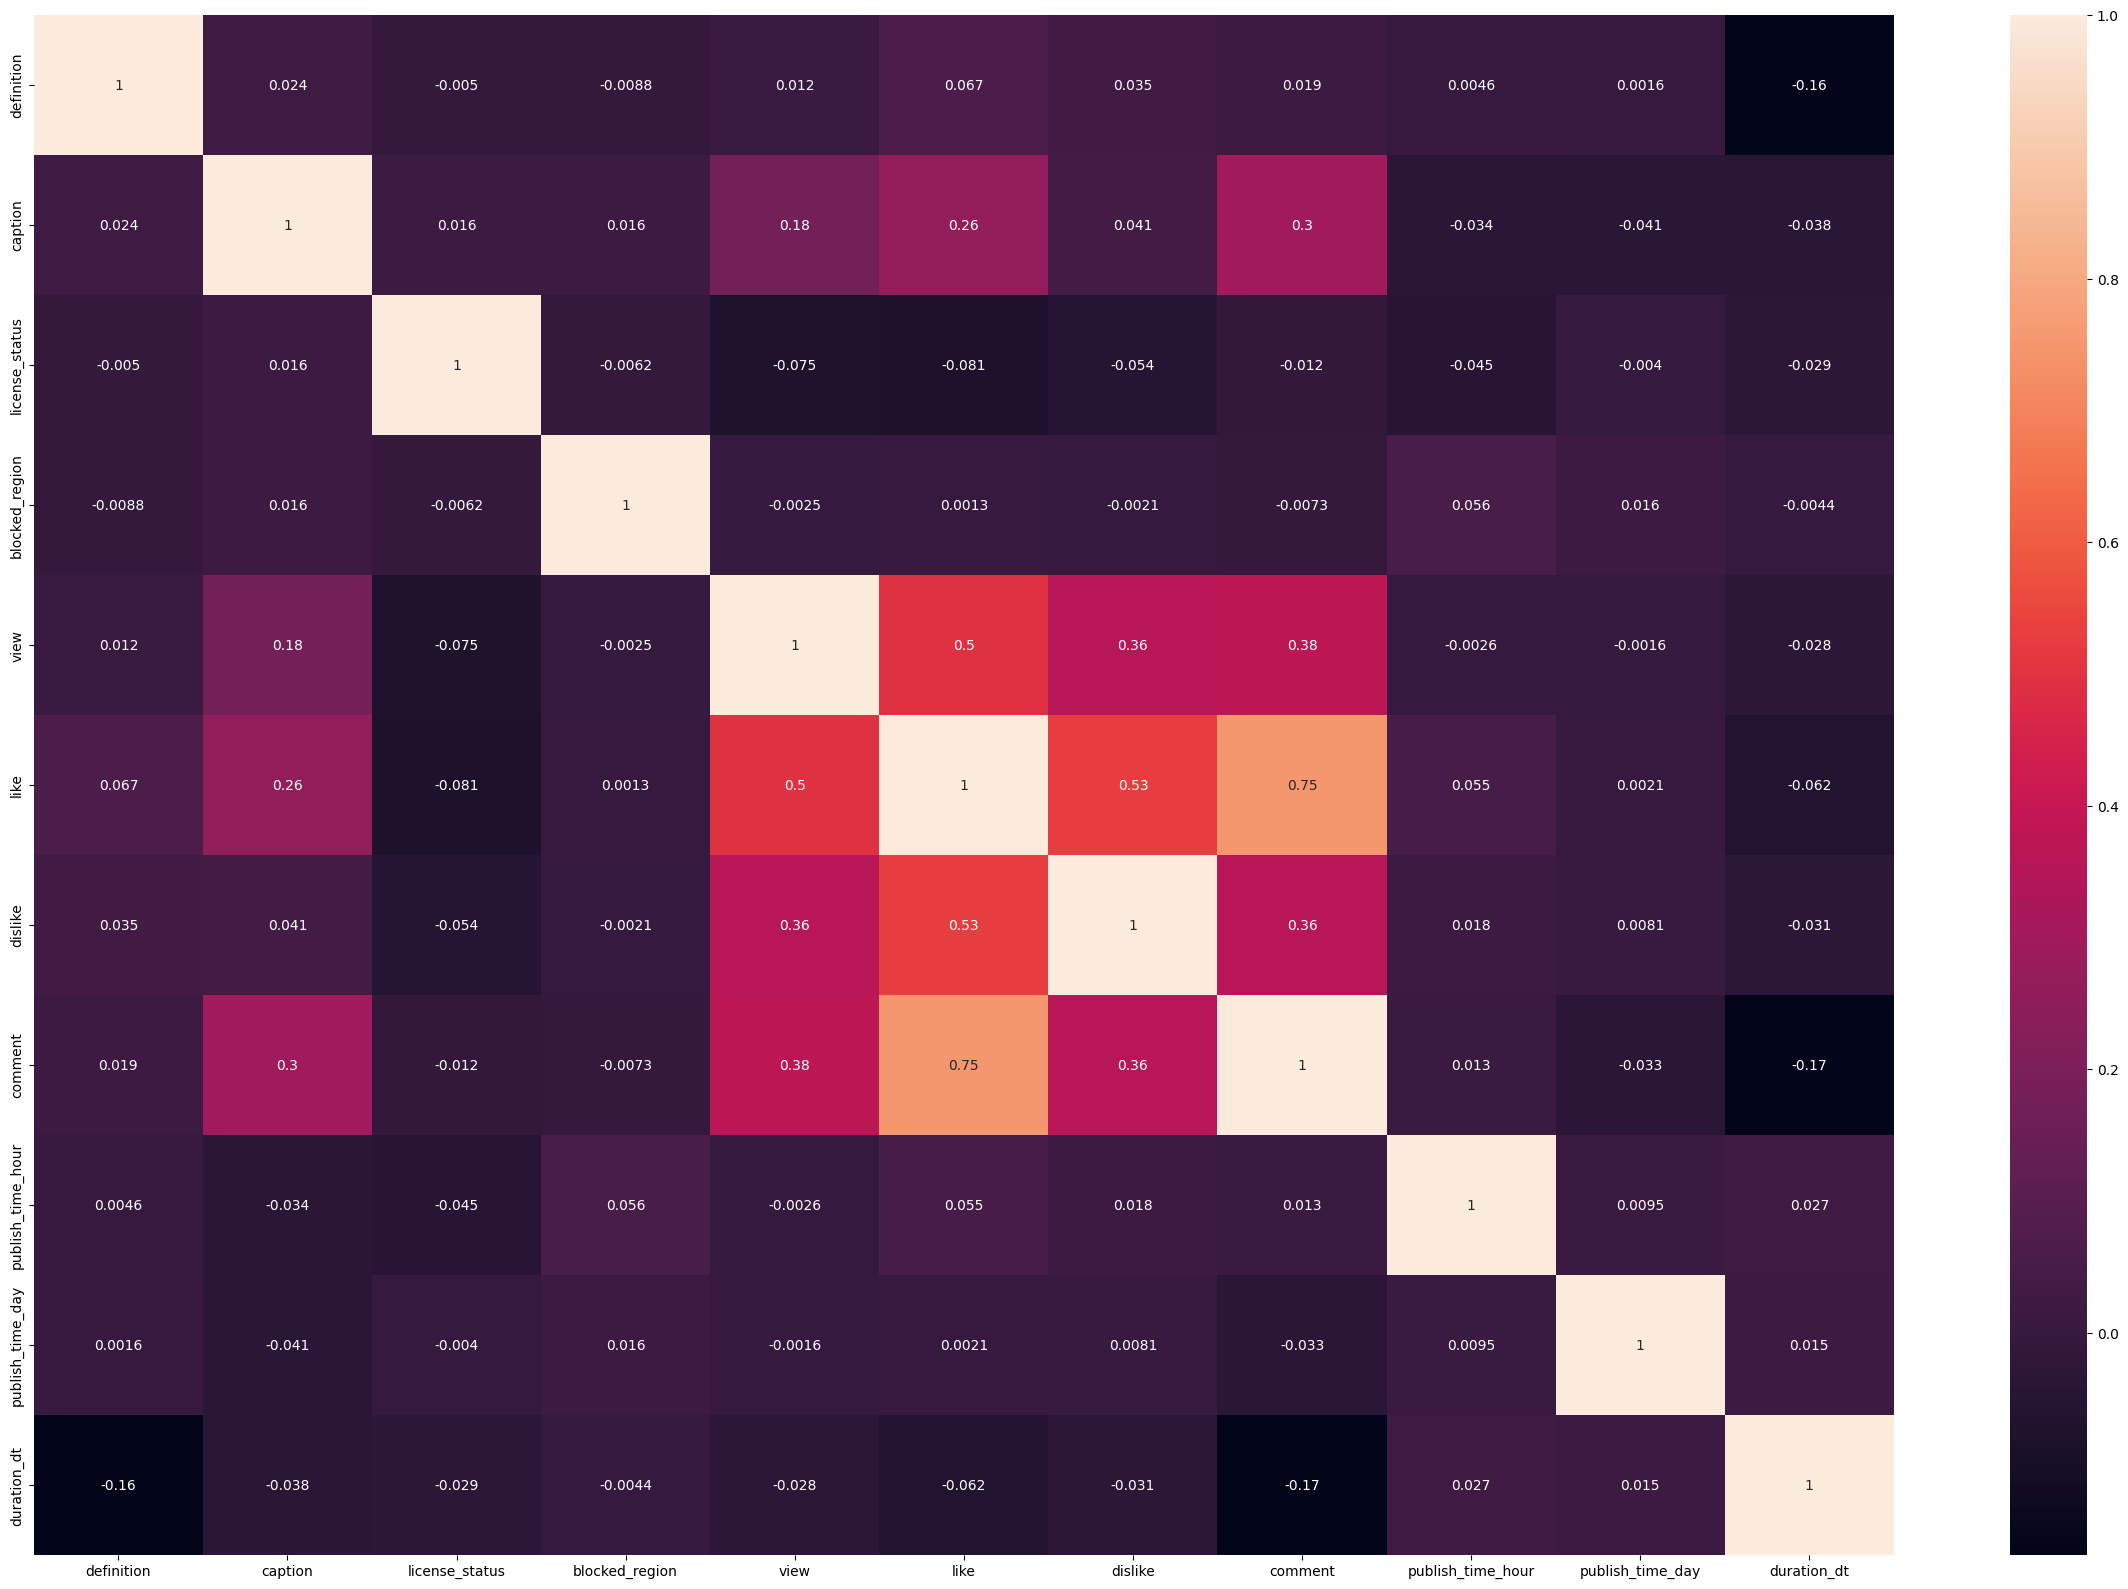

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))   
sns.heatmap(df.corr(), ax = ax,annot=True)

### Calculating t-score
After calculating the Pearson correlation coefficient between two variables, the next step is to determine if the correlation is statistically significant. To do this, we need to calculate the t-score using the formula below.

[t-score](https://www.statology.org/t-test-for-correlation/) = r√(n-2)/(1-r2)

Where:

*   r : correlation coefficient 
*   n : sample size


In [ ]:
def t_score(coef):
  return float(coef)*(math.sqrt((float(384)-float(2))/(1-(float(coef))**float(2))))

In [ ]:
# We can reshape the correlation matrix and automatically calculate the  t-scores as to not do it manually
coef_mask = coef.where(np.triu(np.ones(coef.shape)).astype(np.bool)) # Mask the correlation matrix so that no duplicates are found
coef_mask = coef_mask.stack().reset_index() # Flatten a triangular-shaped correlation to represent a pairwise correlation
coef_mask.columns = ['Var1', 'Var2', 'Coef'] # Rename columns

<ipython-input-34-b30ac1b93ebb>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
coef_mask = coef_mask[coef_mask['Coef'] != 1] # Drop rows where coef is 1.0000
coef_mask = coef_mask[(coef_mask['Var1'] == 'comment') | (coef_mask['Var1'] == 'like') | (coef_mask['Var1'] == 'dislike')]
coef_mask['t-score'] = coef_mask['Coef'].apply(t_score)
coef_mask

,Var1,Var2,Coef,t-score
31,like,dislike,0.529599,12.202711
32,like,comment,0.751395,22.256323
34,dislike,comment,0.362420,7.600131


As we specifically intend to perform Pearson analysis solely on the `like`,`comment` and `dislike` columns, we proceed by parsing the dataframe to include only the required columns.

In [ ]:
print('comment and like t-score is ' + str(t_score(.751395)))
print('comment and dislike t-score is ' + str(t_score(.362420)))
print('dislike and like t-score is ' + str(t_score(.529599)))

comment and like t-score is 22.256301707261763
comment and dislike t-score is 7.600129451968456
dislike and like t-score is 12.202699713188558


 ### Calculate each coefficients' p-value

 Once we have the t-score, we can find the corresponding p-value associated with a t-score using the `scipy.stats.t.sf()` with a significance level of 95% 


In [ ]:
# Similarly we can automatically compute the p-values from the previously-made `coef_mask`.
def compute_pval(t_score):
  return scipy.stats.t.sf(abs(t_score), 382)*2

coef_mask['pval'] = coef_mask['t-score'].apply(compute_pval)
coef_mask 

,Var1,Var2,Coef,t-score,pval
31,like,dislike,0.529599,12.202711,3.797797e-29
32,like,comment,0.751395,22.256323,5.788219e-71
34,dislike,comment,0.362420,7.600131,2.310747e-13


In [ ]:
p1 = scipy.stats.t.sf(abs(t_score(.751395)), 382)*2
p2 = scipy.stats.t.sf(abs(t_score(.362420)), 382)*2
p3 = scipy.stats.t.sf(abs(t_score(.529599)), 382)*2

In [ ]:
print('P value for comment and like is ' + str(p1))
print('P value for comment and dislike is ' + str(p2))
print('P value for dislike and like ' + str(p3))

P value for comment and like is 5.789421960080116e-71
P value for comment and dislike is 2.3107679378681204e-13
P value for dislike and like 3.798177831813624e-29


Based on the results we discovered that the highest correlation and the most significant factor is the number of comments and likes with 0.751395 correlation coefficient and 5.789421960080116 x 10^-71. p-value.


## 3. How do Like, Dislike, and Comments differ from each other?
### Mann-Whitney U Test
>  The Mann-Whitney U Test is a nonparametric test used to test whether two samples are likely to derive from the same population when the sample distributions are not normally distributed.

The `scipy.stats.mannwhitneyu()` function in Python can be used to perform the Mann-Whitney U test.

It is worth noting that the Mann-Whitney U test has the following null and alternate hypoteheses:

* *Null hypothesis:* the two populations have identical distributions.
* *Alternative hypothesis:* the two populations have different medians, but otherwise are identical.

In [ ]:
def MWU(data1,data2):
  stat, p_value = mannwhitneyu(data1, data2)
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # We use level of significance = 95%
  alpha = 0.05
  # Conclusion
  if p_value < alpha:
      print('Reject Null Hypothesis (Significant difference between two samples)')
  else:
      print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Considering Mann-Whitney U Test is a test that may be used when the sample not normally distributed, we therefore use the data before the normalization process, which was saved in `df_new`

In [ ]:
mwu_1 = MWU(df_new['comment'],df_new['like'])
mwu_2 = MWU(df_new['comment'],df_new['dislike'])
mwu_3 = MWU(df_new['dislike'],df_new['like'])

Statistics=2326481664.00, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=16176731155.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)
Statistics=559628412.50, p=0.00
Reject Null Hypothesis (Significant difference between two samples)


Based on the above results, we have significant evidence that the null hypotheses can be rejected. That is, none of the comments, like, and dislike have identical distributions due to all tests returning 0 p-values. Conversely, we infer that they all come from differing distributions.

##4. How do publish time of the video affect views and comments?
First we want to look at the graph for `publish_time` and `view`.

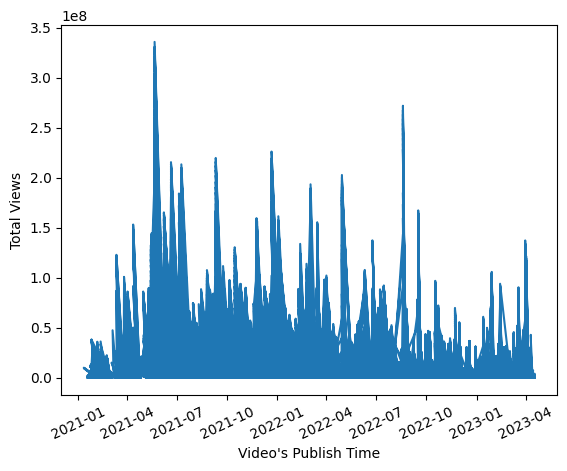

In [ ]:
plt.plot(df['publish_time'],df['view'])
plt.xlabel('Video\'s Publish Time')
plt.ylabel('Total Views')
plt.xticks( rotation=25 )
plt.show()

Since we want to know whether a certain hour or day can yield more views, we pull the hour from `publish_time` and save it as `publish_time_hour`.

In [ ]:
df['publish_time_hour'] = [i.hour for i in df['publish_time']]

We employ the `groupby()` function to perform data aggregation, grouping the sum of views based on the hour.

In [ ]:
view_per_hour = df.groupby('publish_time_hour')['view'].sum()

Subsequently, we generate a plot using the grouped data, allowing us to visualize the distribution of views across different hours and identify the hours that accumulate higher view counts.

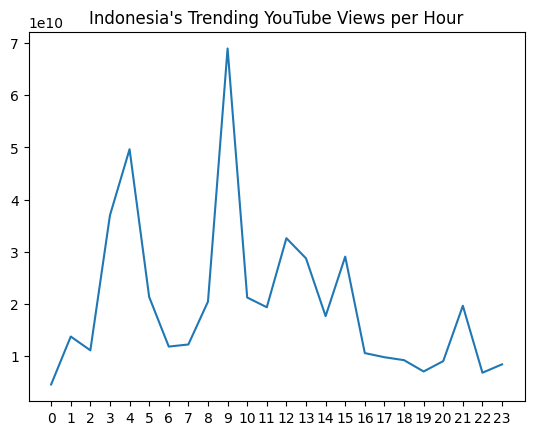

In [ ]:
fig, ax = plt.subplots()
ax.plot(view_per_hour)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 24, 1))
ax.set_title('Indonesia\'s Trending YouTube Views per Hour')
plt.show()

Based on the observed graph, it is evident that videos uploaded at 9 A.M. consistently receive the highest number of views compared to other hours.

To determine the highest views based on the day, we conducted a similar analysis by extracting the day from the `publish_time` and storing it as `publish_time_day`.

In [ ]:
df['publish_time_day'] = [i.weekday() for i in df['publish_time']]
df['publish_time_day']

0         4
1         3
2         5
3         4
4         2
         ..
148144    6
148145    4
148146    5
148147    4
148148    6
Name: publish_time_day, Length: 148149, dtype: int64

Similarly, we employed the groupby() function to aggregate the data and group the sum of views based on the day.

In [ ]:
view_per_day = df.groupby('publish_time_day')['view'].sum()
view_per_day

publish_time_day
0    7.334391e+10
1    6.255452e+10
2    6.059686e+10
3    5.437619e+10
4    1.135852e+11
5    5.493073e+10
6    6.069513e+10
Name: view, dtype: float64

Finally, we plotted the data that was grouped by the day to identify the day that received the highest views.

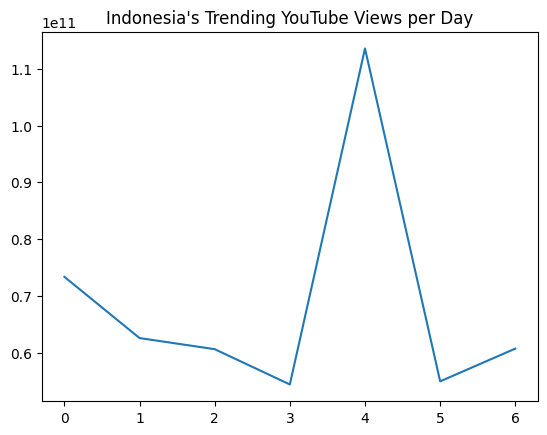

In [ ]:
fig, ax = plt.subplots()
ax.plot(view_per_day)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, 7, 1))
ax.set_title('Indonesia\'s Trending YouTube Views per Day')
plt.show()

In Python, the value 0 in the `weekday()` function corresponds to [Monday](https://pythontic.com/datetime/date/weekday). Based on the graph above, we can conclude that the videos uploaded on Friday received the highest number of views compared to other days.

## 5. What is the average video duration?  
First, we want to see the data for the duration column.

In [ ]:
df['duration']

0           PT5M7S
1         PT42M30S
2         PT46M43S
3         PT45M59S
4          PT5M12S
            ...   
148144       PT45M
148145      PT6M8S
148146       PT51S
148147     PT8M10S
148148     PT16M5S
Name: duration, Length: 148149, dtype: object

We notice every data contains the string 'PT', we're going to strip these to ease the parsing.

In [ ]:
df['duration'] = df['duration'].apply(lambda x: str(x).strip('PT'))

The column `duration` contains data from day to second with different combination in each row, so before we format the data to datetime we need to know every possible combination that could appear to prevent unconverted data.

In [ ]:
for i in range(1,5):
  print(list(combinations('DHMS', i)))

[('D',), ('H',), ('M',), ('S',)]
[('D', 'H'), ('D', 'M'), ('D', 'S'), ('H', 'M'), ('H', 'S'), ('M', 'S')]
[('D', 'H', 'M'), ('D', 'H', 'S'), ('D', 'M', 'S'), ('H', 'M', 'S')]
[('D', 'H', 'M', 'S')]


After we find every possible combination from day to second, we make a function that loop each combination and parse the data as a datetime object for row that match the combination. Also we equalize the data to a minute format.

In [ ]:
# Make a function to change the duration column values
def duration_dt(x):
  if ('DT' in x) & ('H' in x) & ('M' in x) & ('S' in x):
    for i in (('DT', ':'), ('H', ':'), ('M', ':'), ("S", '')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%H:%M:%S').day)*1440
    hours = (pd.to_datetime(x,format='%d:%H:%M:%S').hour)*60
    minut = pd.to_datetime(x,format='%d:%H:%M:%S').minute
    second = (pd.to_datetime(x,format='%d:%H:%M:%S').second)/60
    return  float(days+hours+minut+second)
  elif ('DT' in x) & ('H' in x) & ('M' in x):
    for i in (('DT', ':'), ('H', ':'), ('M', '')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%H:%M').day)*1440
    hours = (pd.to_datetime(x,format='%d:%H:%M').hour)*60
    minut = pd.to_datetime(x,format='%d:%H:%M').minute
    return  float(days+hours+minut)
  elif ('DT' in x) & ('H' in x) & ('S' in x):
    for i in (('DT', ':'), ('H', ':'), ("S", '')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%H:%S').day)*1440
    hours = (pd.to_datetime(x,format='%d:%H:%S').hour)*60
    second = (pd.to_datetime(x,format='%d:%H:%S').second)/60
    return  float(days+hours+second)
  elif ('DT' in x) & ('M' in x) & ('S' in x):
    for i in (('DT', ':'), ('M', ':'), ("S", '')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%H:%M:%S').day)*1440
    minut = pd.to_datetime(x,format='%d:%H:%M:%S').minute
    second = (pd.to_datetime(x,format='%d:%H:%M:%S').second)/60
    return  float(days+hours+minut+second)
  elif ('DT' in x) & ('H' in x):
    for i in (('DT', ':'), ('H', '')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%H').day)*1440
    hours = (pd.to_datetime(x,format='%d:%H').hour)*60
    return  float(days+hours)
  elif ('DT' in x) & ('M' in x):
    for i in (('DT', ':'),('M', '')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%M').day)*1440
    minut = pd.to_datetime(x,format='%d:%M').minute
    return  float(days+minut)
  elif ('DT' in x) & ('S' in x):
    for i in (('DT', ':'), ("S", '')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%S').day)*1440
    second = (pd.to_datetime(x,format='%d:%S').second)/60
    return  float(days+hours+second)
  elif ('H' in x) & ('M' in x) & ('S' in x):   
    for r in (("H", ":"), ("M", ":"), ("S", "")):
      x = x.replace(*r)
    hours = (pd.to_datetime(x,format='%H:%M:%S').hour)*60
    minut = pd.to_datetime(x,format='%H:%M:%S').minute
    second = (pd.to_datetime(x,format='%H:%M:%S').second)/60
    return  float(hours+minut+second)
  elif ('H' in x) & ('M' in x) :
    for r in (("H", ":"), ("M", "")):
      x = x.replace(*r)
    hours = (pd.to_datetime(x,format='%H:%M').time().hour)*60
    minut = pd.to_datetime(x,format='%H:%M').time().minute
    return float(hours+minut)
  elif ('H' in x) & ('S' in x):
    for r in (("H", ":"), ("S", "")):
      x = x.replace(*r)
    hours = (pd.to_datetime(x,format='%H:%S').time().hour)*60
    second = (pd.to_datetime(x,format='%H:%S').time().second)/60
    return float(hours+second)
  elif ('DT' in x) :
    for i in (('DT', ':')):
      x = x.replace(*i)
    days = (pd.to_datetime(x,format='%d:%S').day)*1440
    return  float(days)
  elif ('H' in x):
    for r in (("H", ""),):
      x = x.replace(*r)
    return float((pd.to_datetime(x,format='%H').hour)*60)
  elif ('M' in x) & ('S' in x):
    for r in (("M", ":"
    
    ),("S", "")):
      x = x.replace(*r)
    minute = pd.to_datetime(x,format='%M:%S').time().minute
    second = (pd.to_datetime(x,format='%M:%S').time().second)/60
    return float(minute+second)
  elif ('M' in x):
    for r in (("M", ""),):
      x = x.replace(*r)
    return float(pd.to_datetime(x,format='%M').time().minute)
  elif ('S' in x):
    for r in (("S", ""),):
      x = x.replace(*r)
    return float((pd.to_datetime(x,format='%S').time().second)/60)
  else:
    return x


Using list comprehension we apply the function to every row in `duration` then we assign to a `duration_dt` column

In [ ]:
df['duration_dt'] = [duration_dt(i) for i in df['duration']]
df['duration_dt'].dtype

dtype('float64')

Now that the data type is 'float64' we can directly use mean() function to find the mean of duration.

In [ ]:
df['duration_dt'].mean()

19.406353513467295

In [ ]:
print('The average duration of Indonesia\'s Trending YouTube Video is :', df['duration_dt'].mean(), 'minutes') 

The average duration of Indonesia's Trending YouTube Video is : 19.406353513467295 minutes


##6. On average, how long after uploading will the video be marked as 'trending'?

Prior to begin our analysis, we would like to ascertain whether both columns are marked with the same timezone.

In [ ]:
print(df['trending_time'])

0        2021-02-07 05:46:51.832614+00:00
1        2021-02-07 05:46:51.832649+00:00
2        2021-02-07 05:46:51.832664+00:00
3        2021-02-07 05:46:51.832678+00:00
4        2021-02-07 05:46:51.832730+00:00
                       ...               
148144   2023-04-18 06:04:24.338378+00:00
148145   2023-04-18 06:04:24.338388+00:00
148146   2023-04-18 06:04:24.338398+00:00
148147   2023-04-18 06:04:24.338408+00:00
148148   2023-04-18 06:04:24.338700+00:00
Name: trending_time, Length: 148149, dtype: datetime64[ns, UTC]


In [ ]:
print(df['publish_time'])

0        2021-02-05 09:00:34
1        2021-02-04 15:54:08
2        2021-02-06 03:00:22
3        2021-02-05 20:26:08
4        2021-02-03 23:14:54
                 ...        
148144   2023-04-02 06:11:43
148145   2023-03-31 11:30:10
148146   2023-04-01 07:59:57
148147   2023-03-31 00:00:12
148148   2023-04-02 10:00:19
Name: publish_time, Length: 148149, dtype: datetime64[ns]


We notice that the `trending_time` has a UTC timezone and the `publish_time` does not have any timezone written. 

So, we localize the `trending_time` using `dt.tz_localize()`.
[`dt.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html) is a method used to localize a timezone-naive datetime object to a specific timezone.


In [ ]:
df['trending_time'] = df['trending_time'].dt.tz_localize(None)
df['trending_time']

0        2021-02-07 05:46:51.832614
1        2021-02-07 05:46:51.832649
2        2021-02-07 05:46:51.832664
3        2021-02-07 05:46:51.832678
4        2021-02-07 05:46:51.832730
                    ...            
148144   2023-04-18 06:04:24.338378
148145   2023-04-18 06:04:24.338388
148146   2023-04-18 06:04:24.338398
148147   2023-04-18 06:04:24.338408
148148   2023-04-18 06:04:24.338700
Name: trending_time, Length: 148149, dtype: datetime64[ns]

Once the `publish_time` and `trending_time` have been localized, we calculate the time difference between them by subtracting the `publish_time` from the `trending_time`. This allows us to determine the duration between when a video was published and when it started trending.

In [ ]:
df['trending_gap'] = df['trending_time'] - df['publish_time']
df['trending_gap']

0         1 days 20:46:17.832614
1         2 days 13:52:43.832649
2         1 days 02:46:29.832664
3         1 days 09:20:43.832678
4         3 days 06:31:57.832730
                   ...          
148144   15 days 23:52:41.338378
148145   17 days 18:34:14.338388
148146   16 days 22:04:27.338398
148147   18 days 06:04:12.338408
148148   15 days 20:04:05.338700
Name: trending_gap, Length: 148149, dtype: timedelta64[ns]

From the above results, we then can call the `mean()` of the `trending_gap` column to extract the average time span for all 148,149 videos.

In [ ]:
print('Average trending video require', df['trending_gap'].mean())

Average trending video require 8 days 13:14:29.559902717


The 13:14:29.559902717 refer to 13 hours 14 minutes and 29 seconds. Hence on average, we infer that a video would take 8 days, 13 hours, 14 minutes, and 29 seconds to be trending.

# Acknowledgements and Recommendations
The dataset was uploaded to [Kaggle](https://www.kaggle.com/datasets/syahrulhamdani/indonesias-trending-youtube-video-statistics?select=trending.csv)
 by the user [Syahrul Hamdani](https://www.kaggle.com/syahrulhamdani) around June 2022.

Original data is extracted using the YouTube API. Heavily inspired by the work of @rsrishav and @datasnaek with similar dataset mentioned earlier.

For future analysis, it is advisable to dig deeper into the relationship between the video's title tags and the number of views. Additionally, employing machine learning techniques to forecast upcoming trending videos on YouTube would be beneficial.


---


# Data License
This data is licensed under [Creative Commons Attribution-Universal (CC0 1.0)](https://creativecommons.org/publicdomain/zero/1.0/). I hereby affirm that I do not possess any material nor monetary benefit by doing this project.

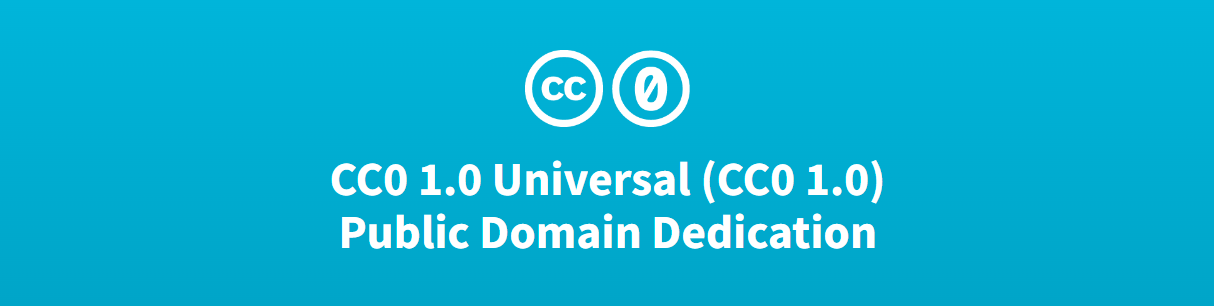